In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'y_dataset')

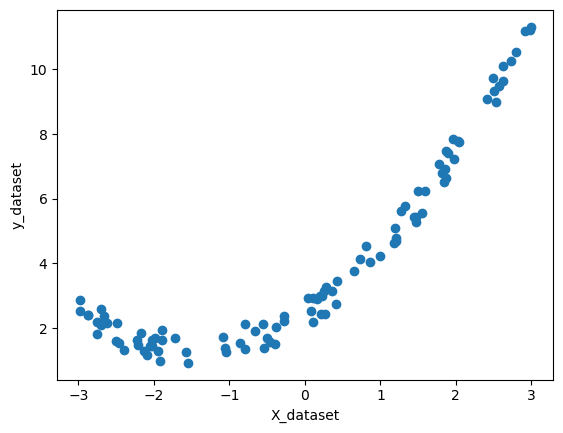

In [2]:
X = 6 * np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.rand(100,1)
# quadratic equation used -> y = 0.5x^2 + 1.5x + 2 + outliers

plt.scatter(X,y)
plt.xlabel("X_dataset")
plt.ylabel("y_dataset")

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Simple linear Regression

In [4]:
## simple linear regression
from sklearn.linear_model import LinearRegression

rg1 = LinearRegression()


In [5]:
rg1.fit(X_train,y_train)

LinearRegression()

In [6]:
## here we dont do scaling because we use quadratic equation so it already in normally distributed so no need to standardize/scaling
from sklearn.metrics import r2_score
score = r2_score(y_test,rg1.predict(X_test))
print(score)

0.4594361099172597


Text(0, 0.5, 'y_dataset')

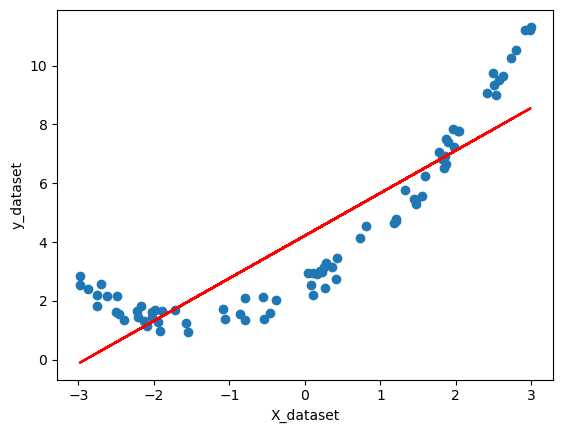

In [7]:
## visulaize the model
plt.scatter(X_train,y_train)
plt.plot(X_train,rg1.predict(X_train), color = 'r')
plt.xlabel("X_dataset")
plt.ylabel("y_dataset")

## Polynomial Regression

### degree 2

In [8]:
## lets apply polynomial trasformation
from sklearn.preprocessing import PolynomialFeatures

In [9]:
p = PolynomialFeatures(degree = 2, include_bias = True)
X_train_p = p.fit_transform(X_train)
X_test_p = p.transform(X_test)

In [10]:
X_train_p[0:5] ## [bias,x,x**2] values

array([[ 1.        ,  0.24745718,  0.06123506],
       [ 1.        ,  0.26283116,  0.06908022],
       [ 1.        ,  1.83602033,  3.37097064],
       [ 1.        , -1.99152085,  3.96615529],
       [ 1.        , -1.89201945,  3.5797376 ]])

In [11]:
X_test_p[0:5] ## [bias,x,x**2] values

array([[ 1.        , -0.65581093,  0.43008798],
       [ 1.        , -2.7096405 ,  7.34215165],
       [ 1.        , -2.70362057,  7.30956418],
       [ 1.        , -2.87925238,  8.29009424],
       [ 1.        , -1.88788844,  3.56412276]])

In [12]:
## include bias parameter
from sklearn.metrics import r2_score
rg2 = LinearRegression()
rg2.fit(X_train_p,y_train)



LinearRegression()

In [13]:
y_pred = rg2.predict(X_test_p)
score = r2_score(y_test,y_pred)
print(score)

0.983709301309477


In [14]:
print(rg2.coef_) ## 3 coef_ -> B1(x^0) + B2(x^1) + B3(X^2) = 0
print(rg2.intercept_) ## only 1 intercept -> only 1 best fir curve

[[0.         1.49362434 0.49751579]]
[2.48236248]


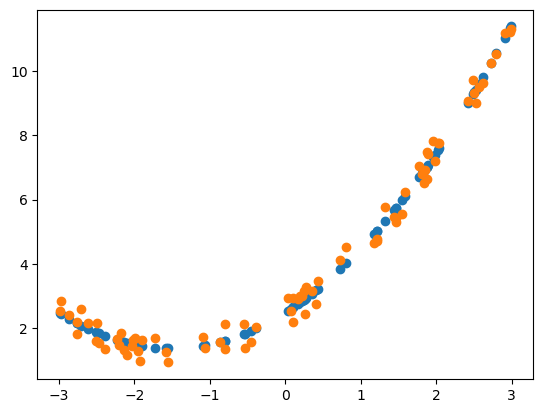

In [15]:
plt.scatter(X_train,rg2.predict(X_train_p)) ## gives best fit curve
plt.scatter(X_train,y_train) ## gives all other points

# plt.xlabel("X_dataset")
# plt.ylabel("y_dataset")

### degree 3

In [16]:
p = PolynomialFeatures(degree = 3, include_bias = True)
X_train_p = p.fit_transform(X_train) # has 4 features
X_test_p = p.transform(X_test)

In [17]:
from sklearn.metrics import r2_score
rg2 = LinearRegression()
rg2.fit(X_train_p,y_train)

LinearRegression()

In [18]:
y_pred = rg2.predict(X_test_p)
score = r2_score(y_test,y_pred)
print(score)

0.9841686173432656


### new data points

In [19]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_p = p.transform(X_new)

In [20]:
X_new_p[0:5]

array([[  1.        ,  -3.        ,   9.        , -27.        ],
       [  1.        ,  -2.96984925,   8.82000455, -26.19408385],
       [  1.        ,  -2.93969849,   8.64182723, -25.40436647],
       [  1.        ,  -2.90954774,   8.46546804, -24.6306834 ],
       [  1.        ,  -2.87939698,   8.290927  , -23.8728702 ]])

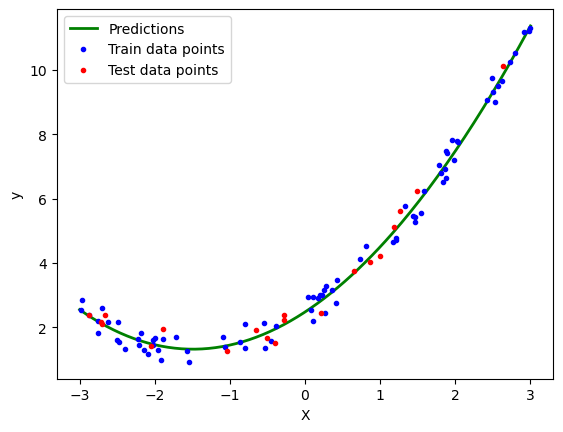

In [21]:
y_new = rg2.predict(X_new_p)
plt.plot(X_new,y_new,"g-",linewidth = 2, label = "Predictions")
plt.plot(X_train,y_train,"b.",label = "Train data points")
plt.plot(X_test,y_test,"r.",label = "Test data points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Pipelining Concept

In [22]:
from sklearn.pipeline import Pipeline

In [23]:
def poly_regression(degree):

    X_new = np.linspace(-3,3,200).reshape(200,1)

    p = PolynomialFeatures(degree = degree,include_bias = True)
    lrg = LinearRegression()
    prg = Pipeline([
        ("poly_features",p),
        ("linear_rg",lrg)
    ])

    prg.fit(X_train,y_train)
    y_pred_new = prg.predict(X_new)

    ## plotting the prediction line
    plt.plot(X_new,y_pred_new,'g', label = "Degree " + str(degree), linewidth = 3)
    plt.plot(X_train,y_train,"b.", linewidth = 3)
    plt.plot(X_test,y_test,"r.", linewidth = 3)
    plt.legend(loc = "upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4,0,10])
    plt.show()

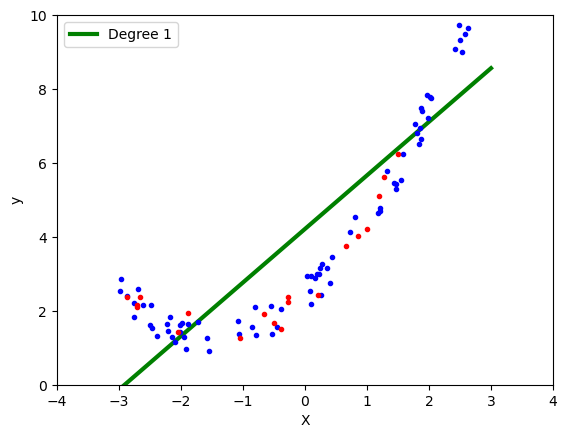

In [24]:
poly_regression(degree = 1)

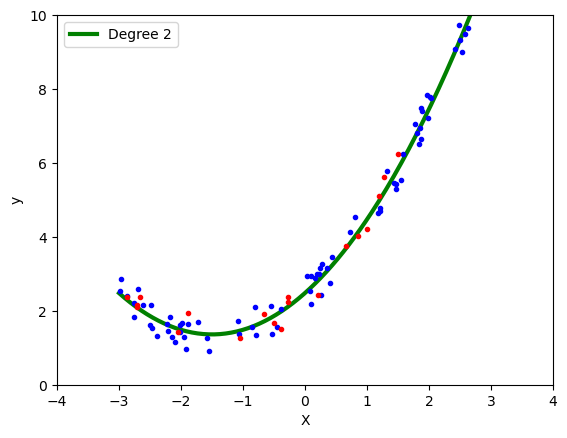

In [25]:
poly_regression(degree = 2)

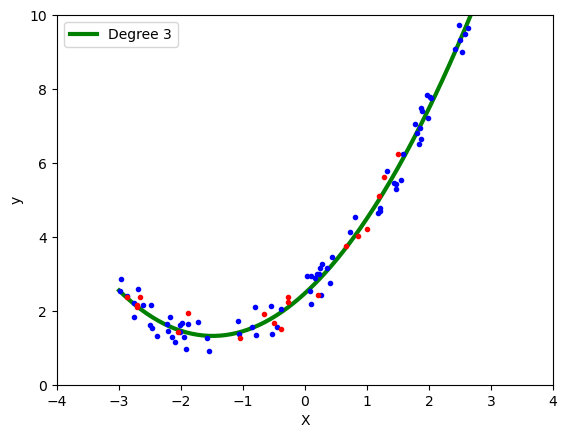

In [26]:
poly_regression(degree = 3)

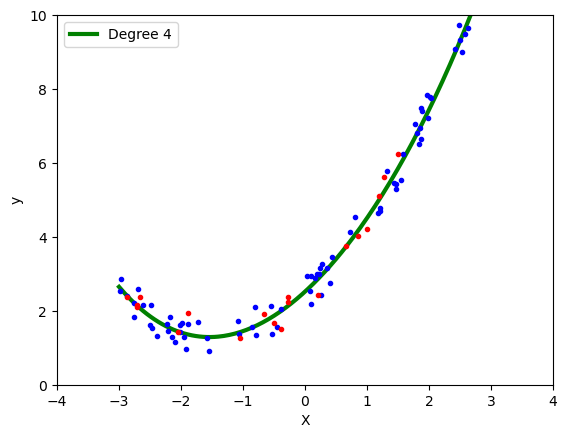

In [27]:
poly_regression(degree = 4)

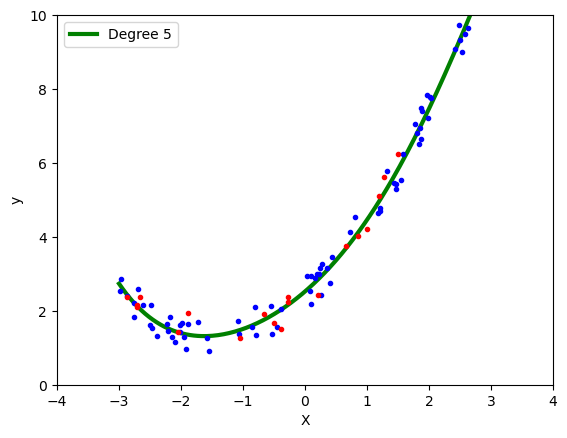

In [28]:
poly_regression(degree = 5)

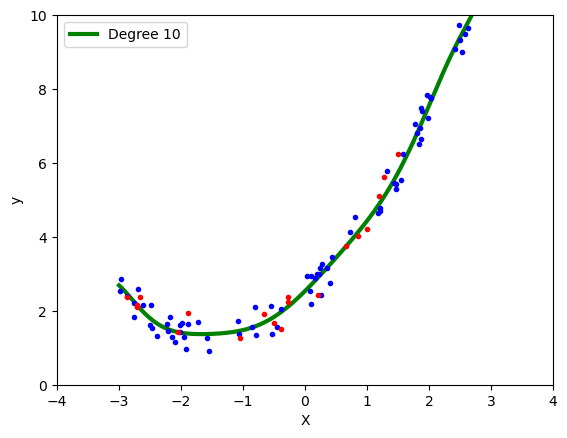

In [29]:
poly_regression(degree = 10)

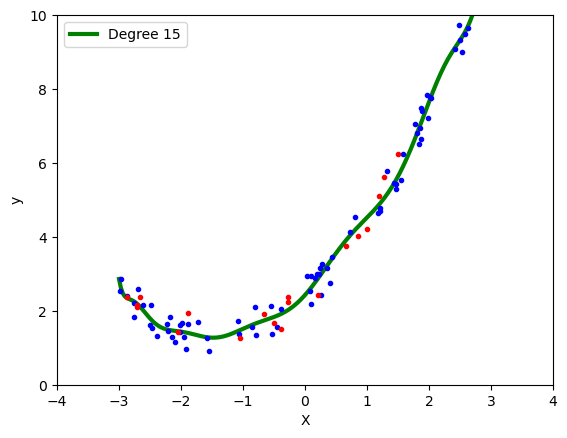

In [30]:
poly_regression(degree = 15)

In [31]:
## whenever we try to increase degreet hen model overfits the each and every point
## so we have to choose that degree for which the model should not be overfitted for every point